In [39]:
import nltk
import random 
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from numpy import mean
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

## Prepare and Preprocessing The data

>

In [ ]:
def text_total(text):
  text1=nltk.corpus.gutenberg.raw(text)
  tokenizer = RegexpTokenizer(r'\w+')
  text2=tokenizer.tokenize(text1)
  stop_words=set(stopwords.words("english"))
  lowercase= [word.lower() for word in text2]
  filtered_sentences = [word for word in lowercase if word not in stop_words]
  return filtered_sentences



In [ ]:
def result(books,labels):
  sequence=[]
  label_result=[]
  k=0
  random.seed(42)
  for text in books:
      for i in range(200):
          r=random.randint(0,len(text))
          sequence.append(' '.join(text[r:r+100]))          #Number of words
          label_result.append(labels[k])
      k=k+1
  return sequence, label_result



In [ ]:
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
names=['bryant-stories','shakespeare-hamlet','austen-emma','melville-moby_dick','chesterton-brown']
texts=[]
for name in names:
  name=name+'.txt'
  texts.append(text_total(name))
sequence, labels=result(texts,names)
df = pd.DataFrame({'sequence':sequence, 'labels':labels})
df


,sequence,labels
0,night mother sat plying needle found difficult...,bryant-stories
1,lost wits bridge white mist columbkill crosses...,bryant-stories
2,little gingerbread boy look good eat little gi...,bryant-stories
3,paid much shoemaker bought leather four pairs ...,bryant-stories
4,cried pretty beautiful oh lovely knew must mea...,bryant-stories
...,...,...
995,mysterious terror forced king pardon murderers...,chesterton-brown
996,said quite calmly lordship allow cross examine...,chesterton-brown
997,natured man good natured putnam pause said loo...,chesterton-brown
998,haman began tell said father brown things wher...,chesterton-brown


#Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, axes, ylim, cv,
                        n_jobs, train_sizes=np.linspace(0.1, 1.0, 5),shuffle= True):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#Models without cross validation

In [ ]:
#SVM mode
def svmmodelv1(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123,shuffle=True,stratify=y)
                                                    
                            
                                                    
  clf = SVC()
  clf.fit(x_train, y_train)

  y_pred = clf.predict(x_test)

  mse, bias, var = bias_variance_decomp(clf, x_train, y_train, x_test, y_test,loss='0-1_loss',random_seed=123)
  # summarize results
  print('MSE: %.3f' % mse)
  print('Bias: %.3f' % bias)
  print('Variance: %.3f' % var)
  
  return metrics.accuracy_score(y_test, y_pred)

#k-neighbor model
def kneighborsv1(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)
  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  mse, bias, var = bias_variance_decomp(clf, x_train, y_train, x_test, y_test, loss='0-1_loss',random_seed=123)
  # summarize results
  print('MSE: %.3f' % mse)
  print('Bias: %.3f' % bias)
  print('Variance: %.3f' % var)
  y_pred = clf.predict(x_test)
  y_pred = clf.predict(x_test)
  return metrics.accuracy_score(y_test, y_pred)

#Decision tree model
def decision_treev1(x,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
  clf = KNeighborsClassifier(n_neighbors=4)
  clf.fit(x_train, y_train)
  mse, bias, var = bias_variance_decomp(clf, x_train, y_train, x_test, y_test, loss='mse', num_rounds=200, random_seed=1)
  # summarize results
  print('MSE: %.3f' % mse)
  print('Bias: %.3f' % bias)
  print('Variance: %.3f' % var)
  y_pred = clf.predict(x_test)
  y_pred = clf.predict(x_test)
  return metrics.accuracy_score(y_test, y_pred)


#Models with cross validation


In [ ]:
#SVM model
def svmmodel(data,label):
  clf = SVC()
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  fig, axes = plt.subplots(3, 1, figsize=(10, 15))
  title="Learning Curves (SVM)"
  plot_learning_curve(clf, title, data, label, axes, ylim=(0.0, 1.3),
                   cv=10, n_jobs=1)
  plt.show()
  y_pred = cross_val_predict(clf, data, label, cv=cv)
  scores = cross_val_score(clf, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
  conf_mat = confusion_matrix(label, y_pred)
  ax= plt.subplot()
  sns.heatmap(conf_mat, annot=True,fmt="d",ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['bryant','shakespeare','austen','melville','chesterton']); ax.yaxis.set_ticklabels(['bryant','shakespeare','austen','melville','chesterton']);
  print("Accuracy = ")
  print(mean(scores))

#Decision tree model
def decision_tree(data,label):
  clf = DecisionTreeClassifier()
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  fig, axes = plt.subplots(3, 1, figsize=(10, 15))
  title="Learning Curves (Decison Tree)"
  plot_learning_curve(clf, title, data, label, axes, ylim=(0.0,1.3),
                   cv=cv, n_jobs=4)
  plt.show()
  y_pred = cross_val_predict(clf, data, label, cv=cv)
  scores = cross_val_score(clf, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
  conf_mat = confusion_matrix(label, y_pred)
  sns.heatmap(conf_mat, annot=True,fmt="d")
  print("Accuracy = ")
  print(mean(scores))

#k-nearest neighbor model
def kneighbors(data,label):
   clf = KNeighborsClassifier(n_neighbors=4)
   cv = KFold(n_splits=10, random_state=1, shuffle=True)
   fig, axes = plt.subplots(3, 1, figsize=(10, 15))
   title="Learning Curves (KNN)"
   plot_learning_curve(clf, title, data, label, axes, ylim=(0.0,1.3),
                   cv=cv, n_jobs=4)
   plt.show()
   y_pred = cross_val_predict(clf, data, label, cv=cv)
   scores = cross_val_score(clf, data, label, scoring='accuracy', cv=cv, n_jobs=-1)
   conf_mat = confusion_matrix(label, y_pred)
   sns.heatmap(conf_mat, annot=True,fmt="d")
   print("Accuracy = ")
   print(mean(scores))

# Text Classification

In [ ]:
#df.info()

# Feature Generation using Bag of Words




In [ ]:
cv = CountVectorizer(ngram_range = (1,1))
text_counts= cv.fit_transform(df['sequence'])

BOW:



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.p

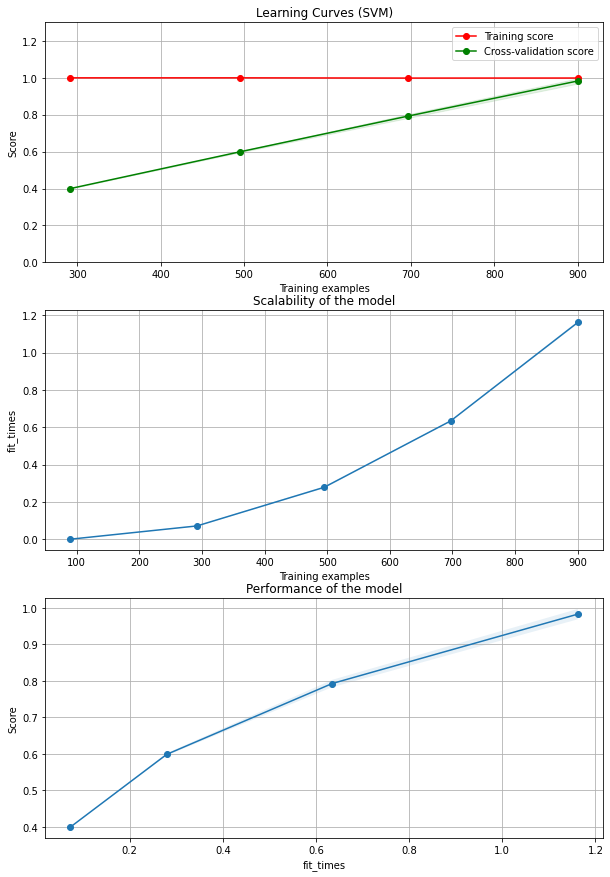

Accuracy = 
0.982


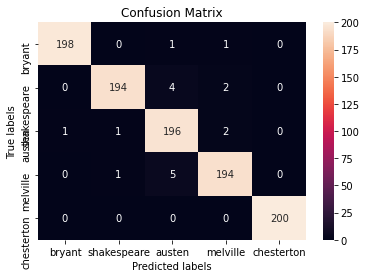

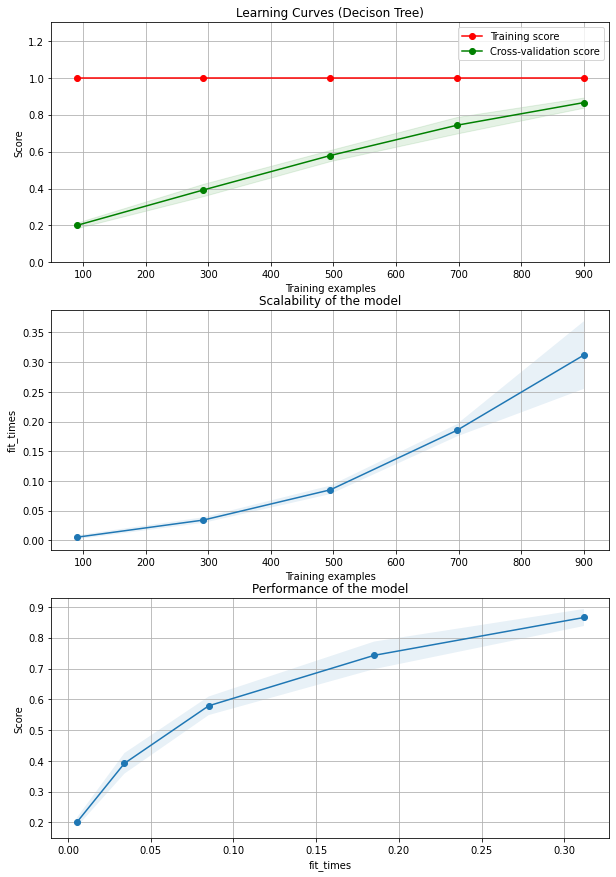

Accuracy = 
0.8789999999999999


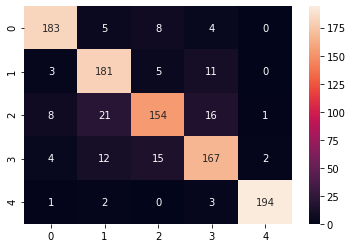

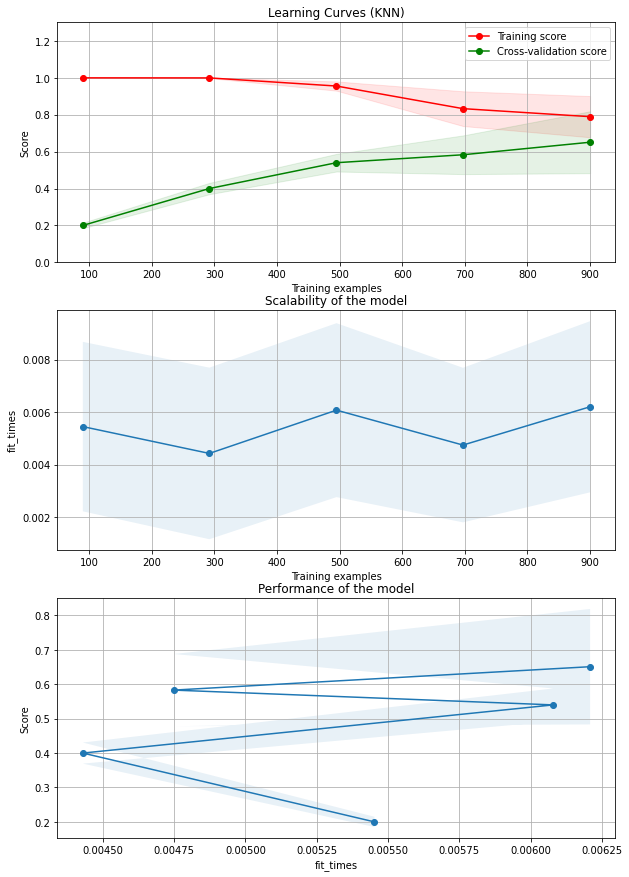

Accuracy = 
0.651


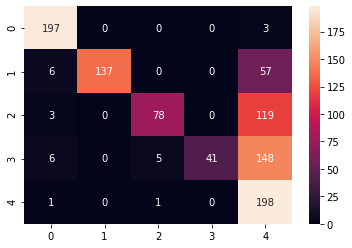

In [ ]:
print("BOW:\n")
svmmodel(text_counts,df['labels'])

decision_tree(text_counts,df['labels'])

kneighbors(text_counts,df['labels'])

#Feature Generation using N-gram
>

In [ ]:
def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

In [ ]:
df.sequence=df['sequence'].astype(str)
tokenize=[]
i=0
for i in range (len(df.sequence)):
  #p.append(get_ngrams(df.sequence[i],3))
  tokenize.append(nltk.word_tokenize(df.sequence[i]))


In [ ]:
cv_ngram = CountVectorizer(ngram_range = (2,2))
text_counts_ngram= cv_ngram.fit_transform(df['sequence'])

n-gram:



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.p

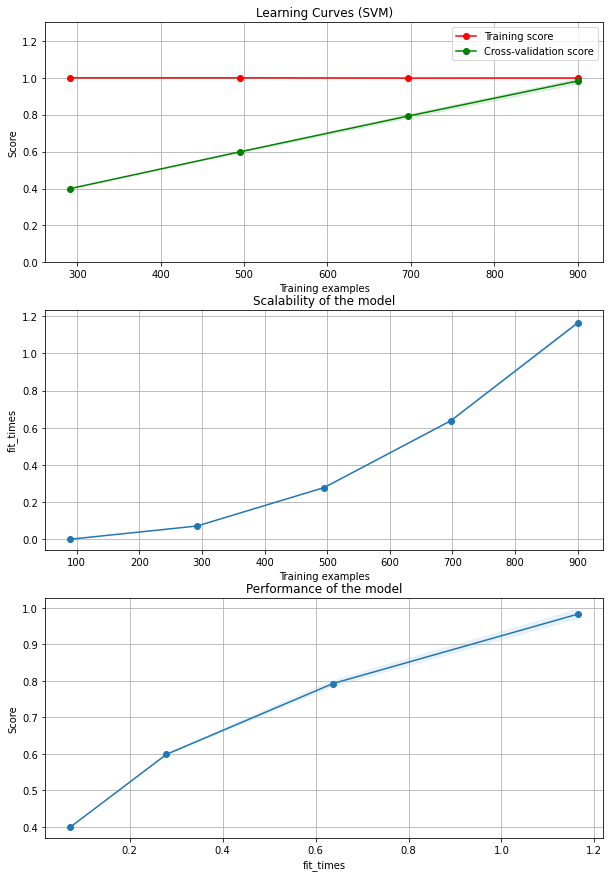

Accuracy = 
0.982


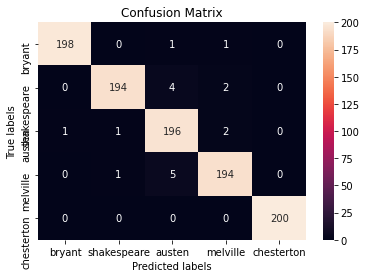

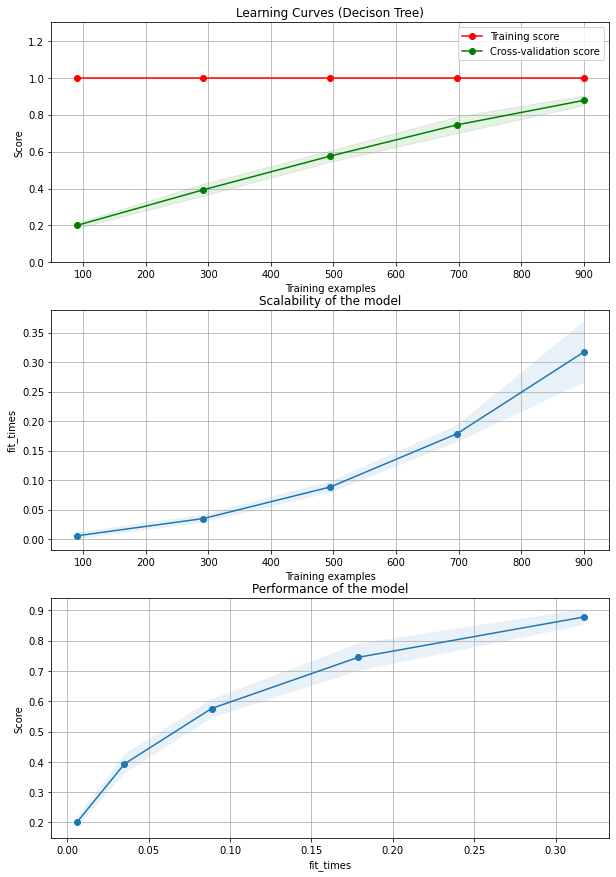

Accuracy = 
0.8699999999999999


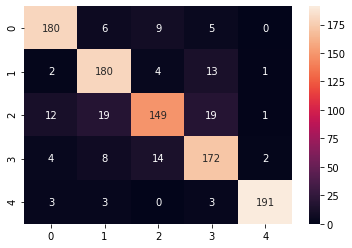

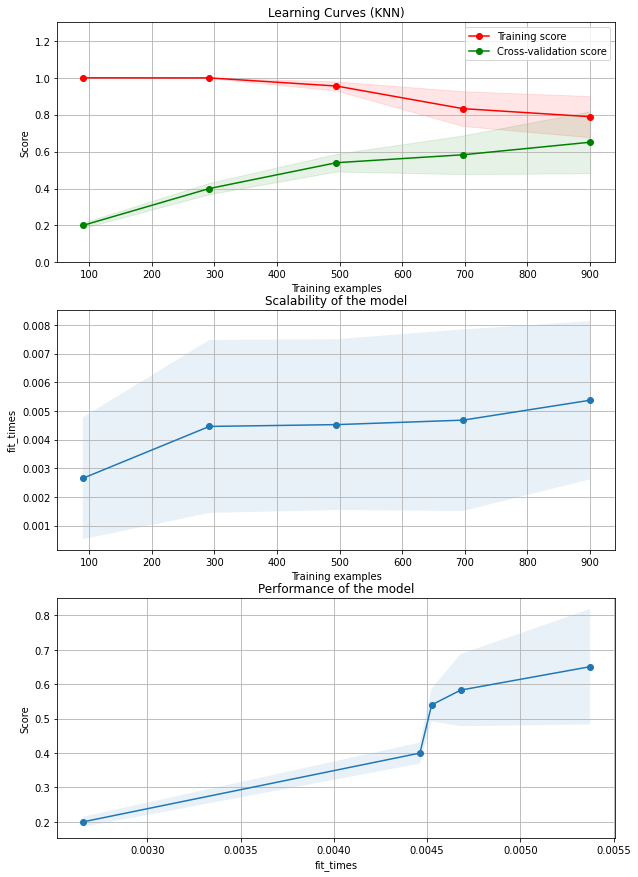

Accuracy = 
0.651


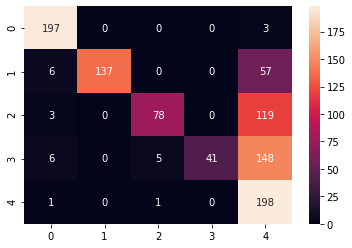

In [ ]:
print("n-gram:\n")
svmmodel(text_counts,df['labels'])

decision_tree(text_counts,df['labels'])

kneighbors(text_counts,df['labels'])


# Feature Generation using TF-IDF


In [ ]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['sequence'])

TF-IDF:



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.p

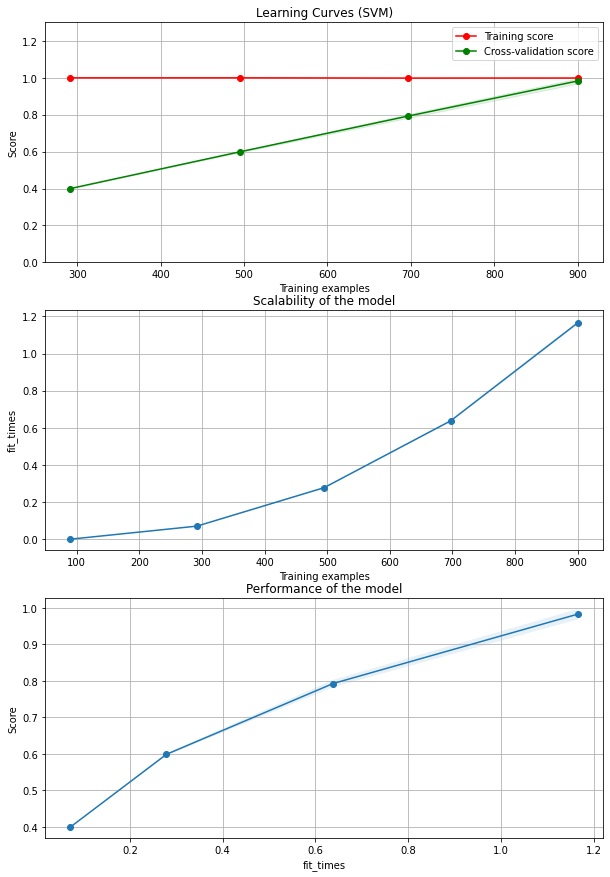

Accuracy = 
0.982


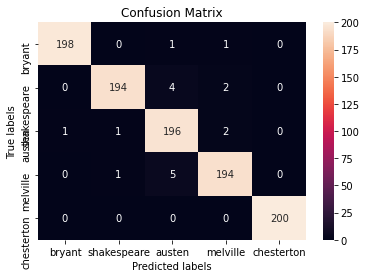

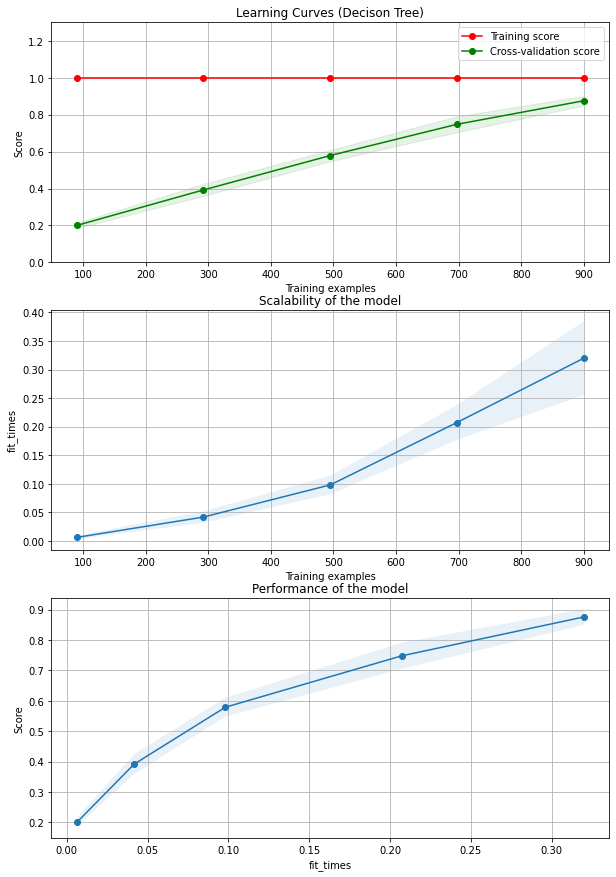

Accuracy = 
0.868


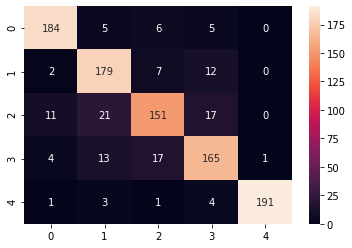

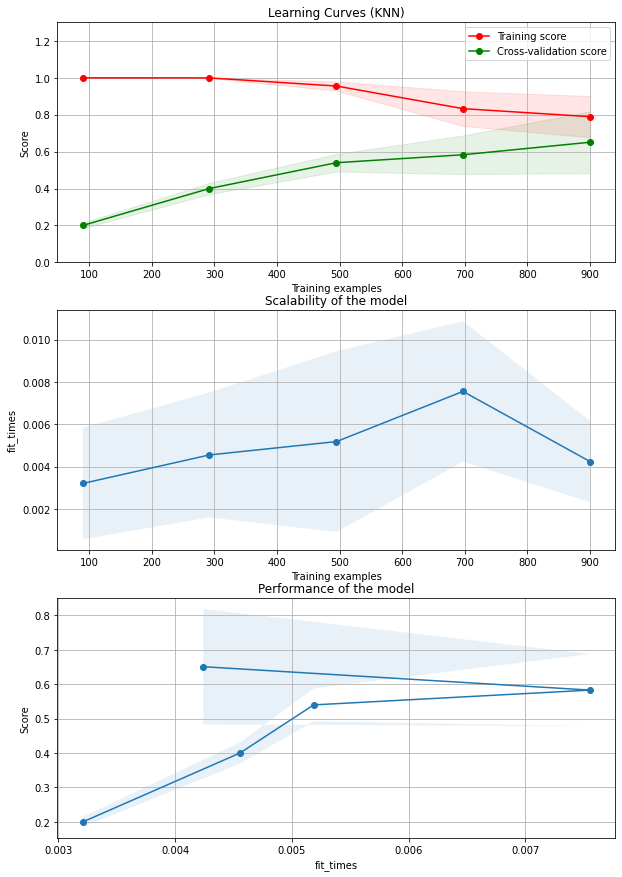

Accuracy = 
0.651


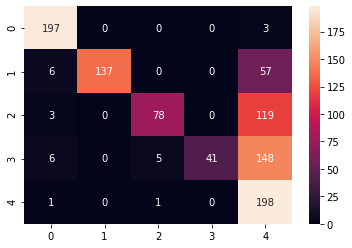

In [ ]:
print("TF-IDF:\n")
svmmodel(text_counts,df['labels'])

decision_tree(text_counts,df['labels'])

kneighbors(text_counts,df['labels'])

#Doc2Vec

In [ ]:
tagged_tr = [TaggedDocument(words=word_tokenize(_d.lower()),
tags=[str(i)]) for i, _d in enumerate(df['sequence'])]


In [ ]:
model = Doc2Vec(vector_size=100,
                window=5, 
                alpha=.025, 
                min_alpha=0.00025, 
                min_count=2, 
                dm=1, 
                workers=8)
model.build_vocab(tagged_tr)

In [ ]:
epochs = range(100)
for epoch in epochs:
    print(f'Epoch {epoch+1}')
    model.train(tagged_tr,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.00025
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
     
model.save('paragraph.model')

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100


In [ ]:
X = np.array([model.docvecs[str(i)] for i in range(len(tagged_tr))])
y = df['labels']

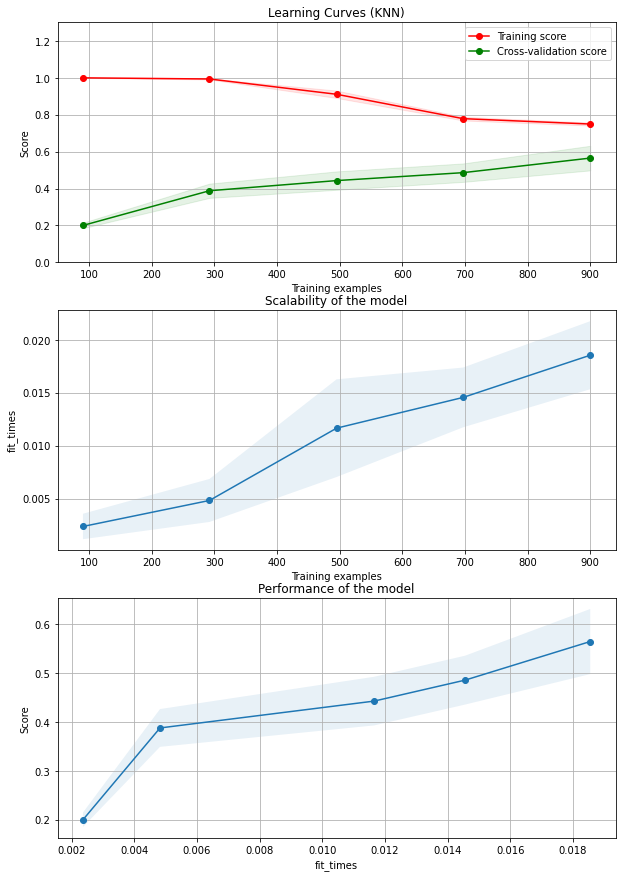

Accuracy = 
0.565


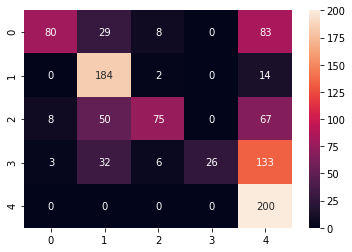

In [ ]:
kneighbors(X,y)

#Data visualization 

In [40]:
# Define a function to plot word cloud
def plot_cloud(wordcloud,x):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plt.imshow(wordcloud)
    plt.title(x,fontsize=36)
    plt.axis("off")
    plt.show()

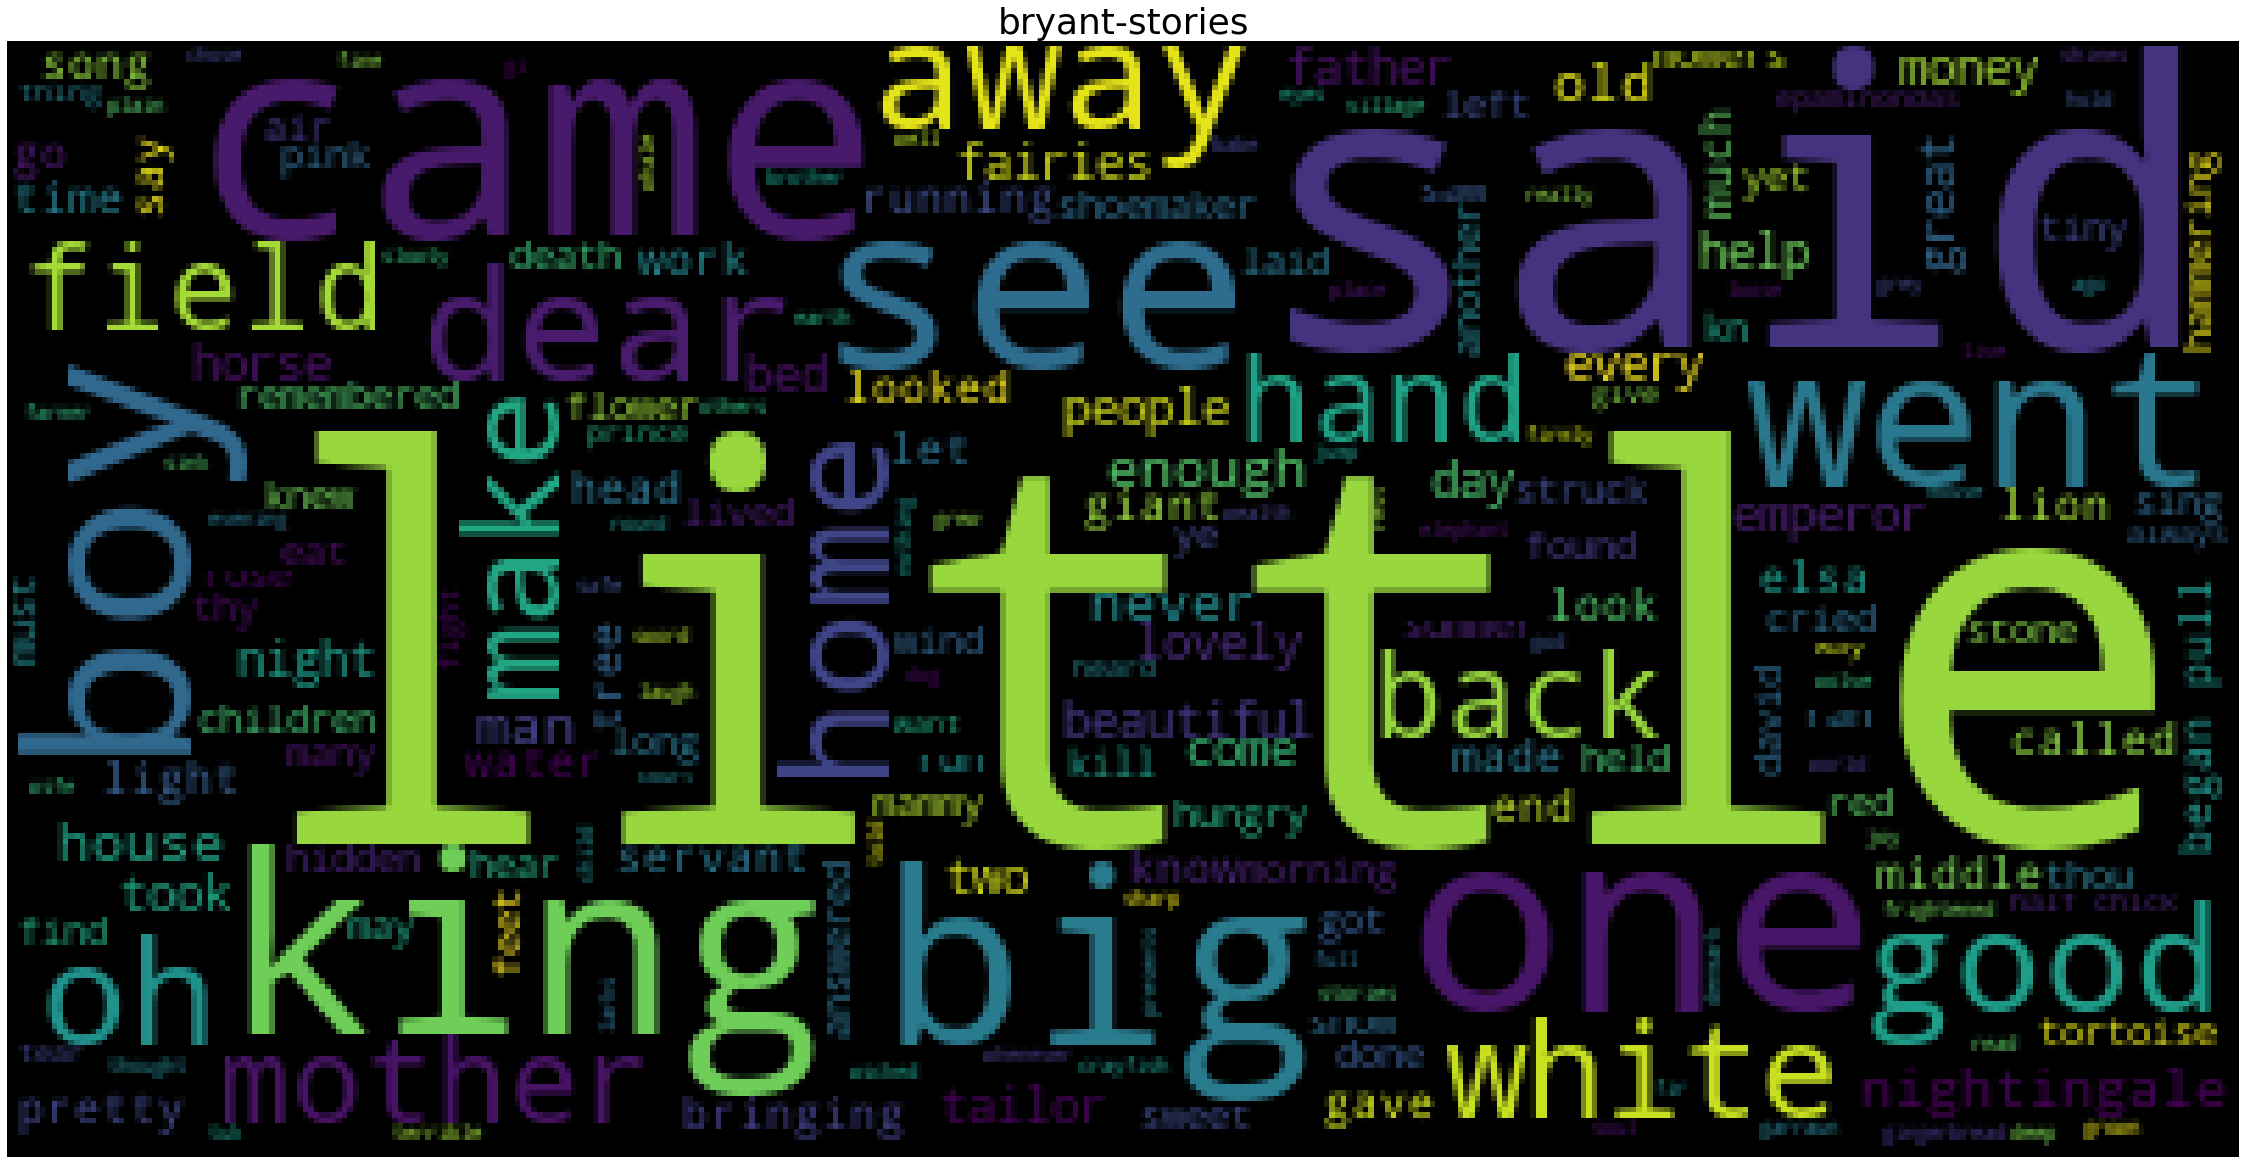

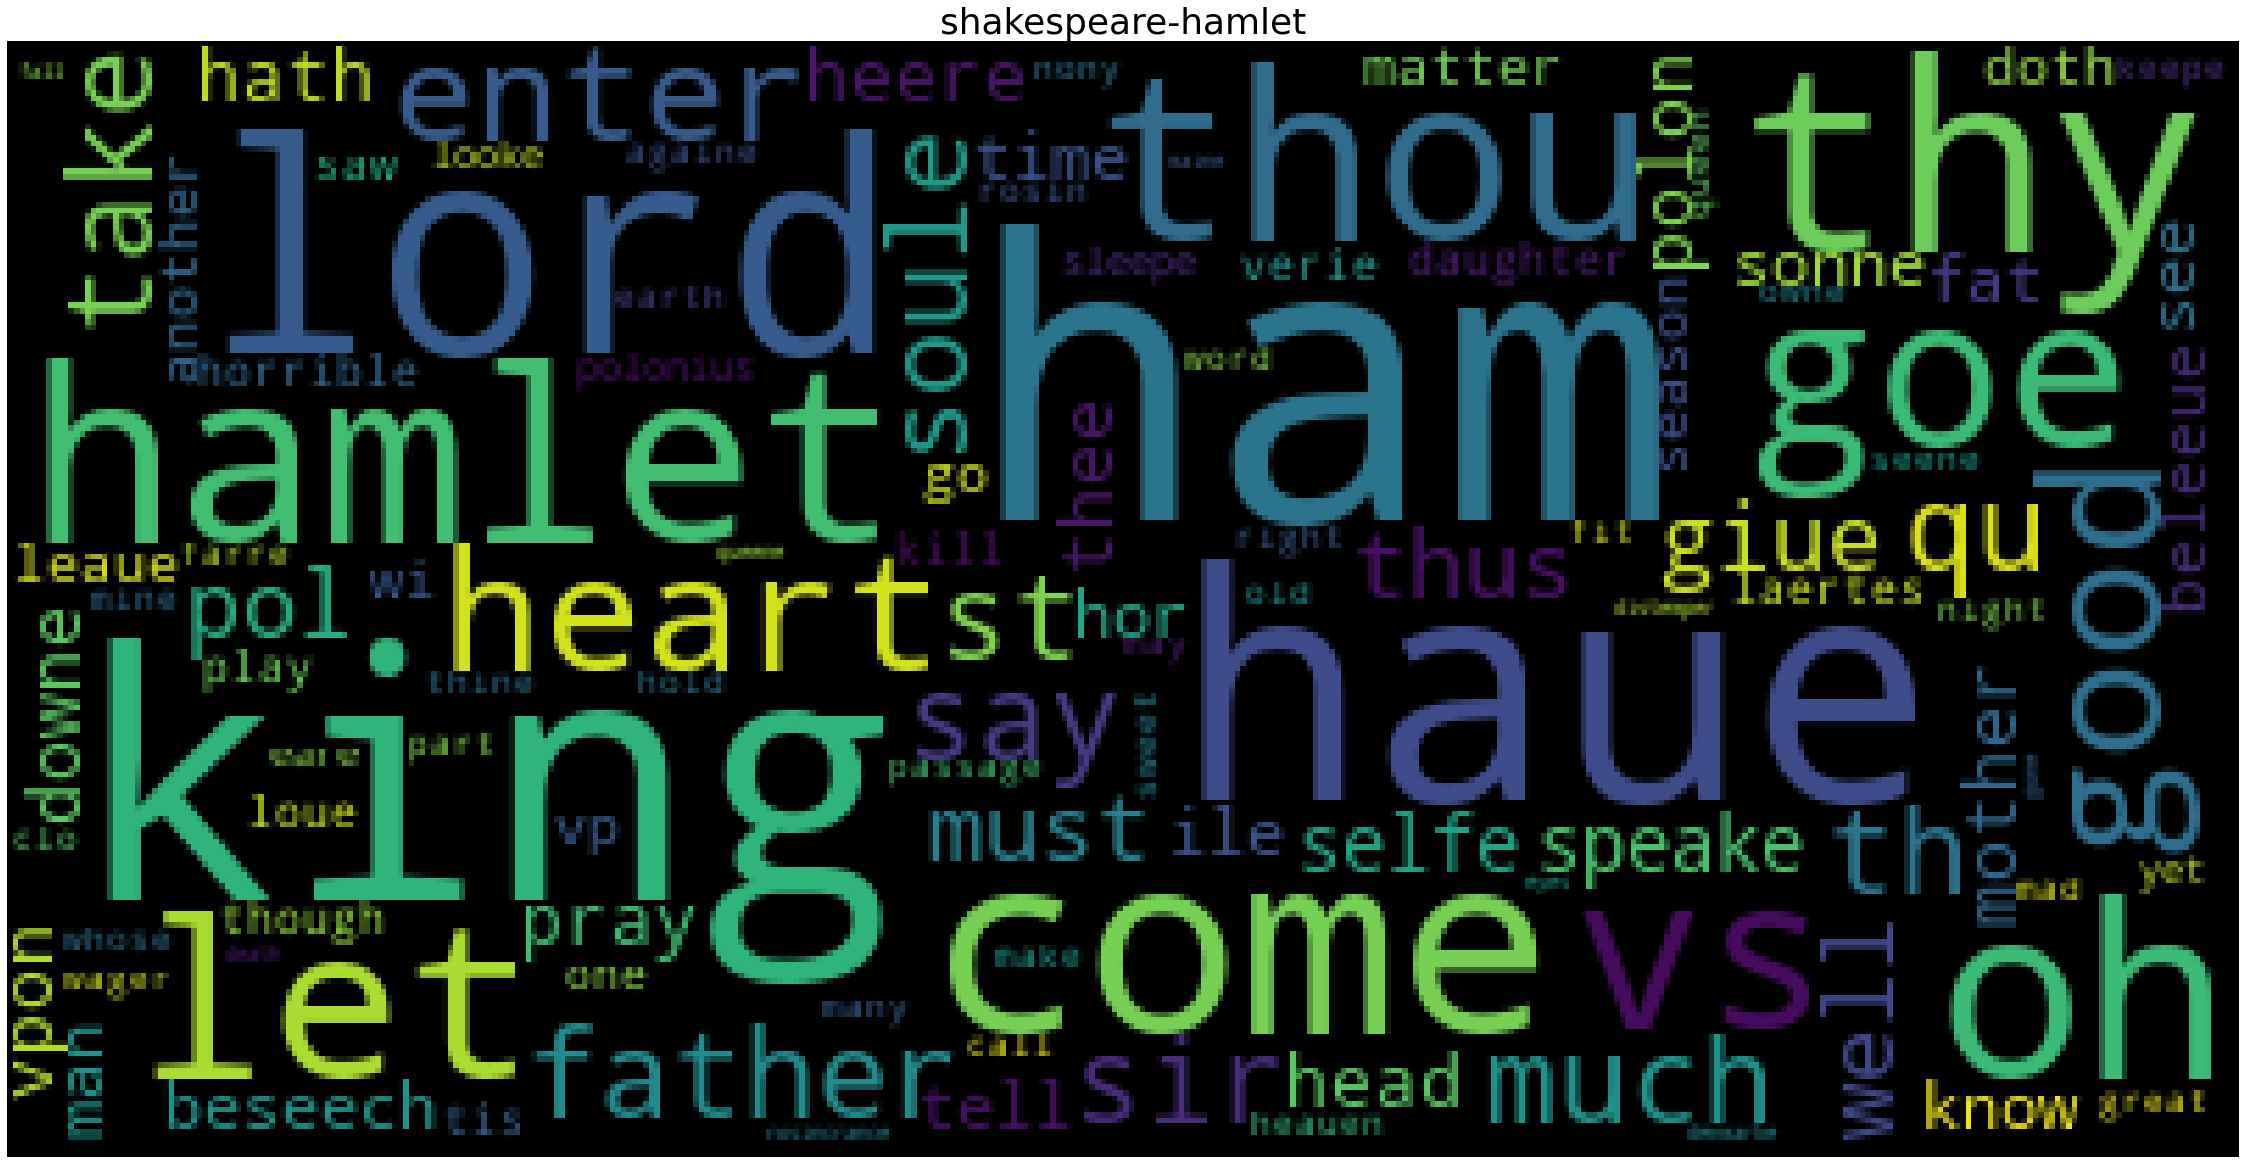

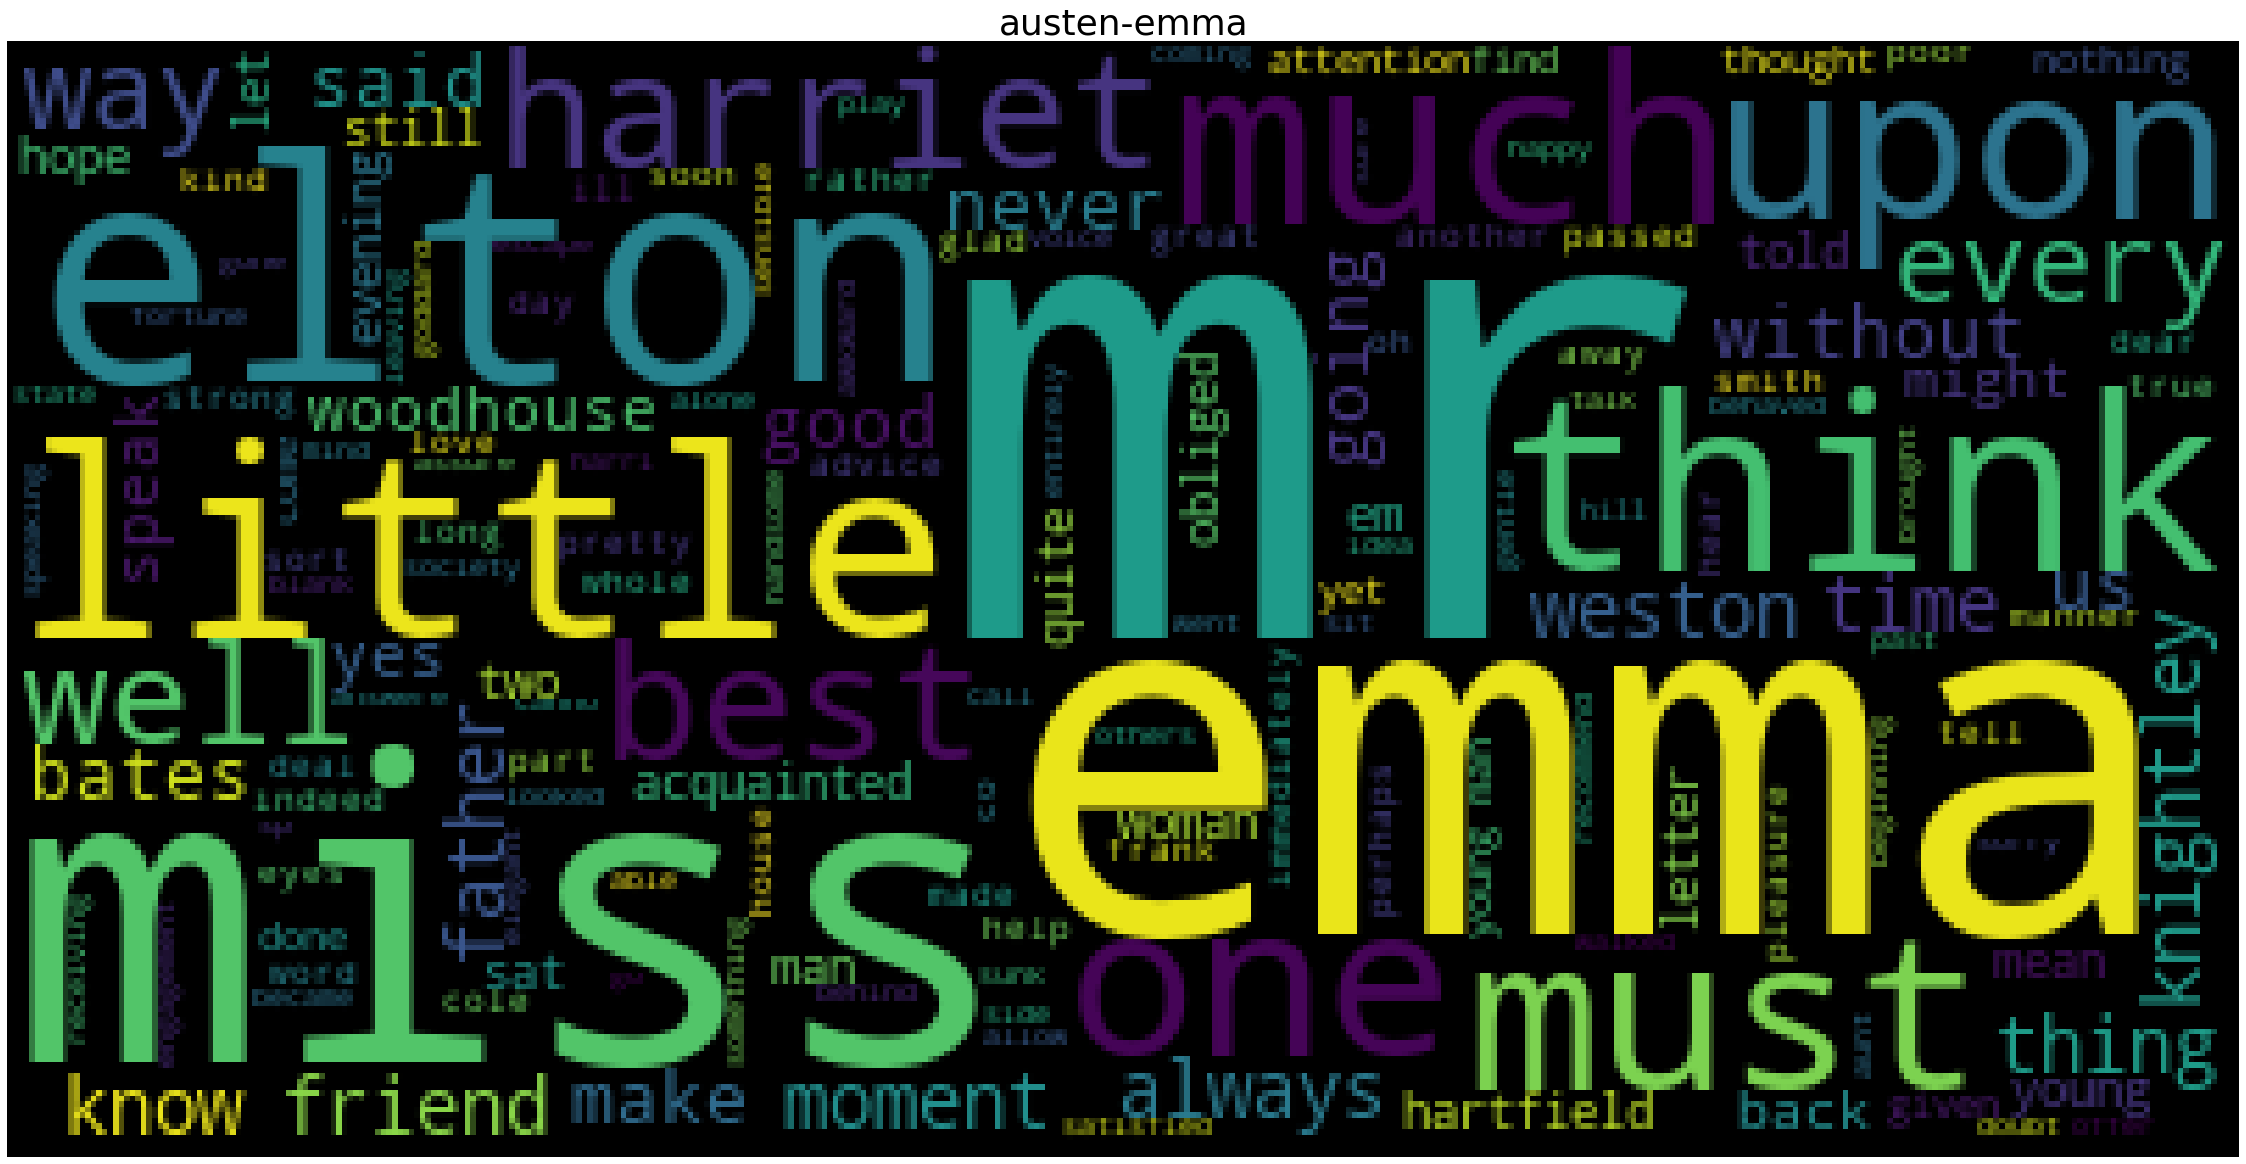

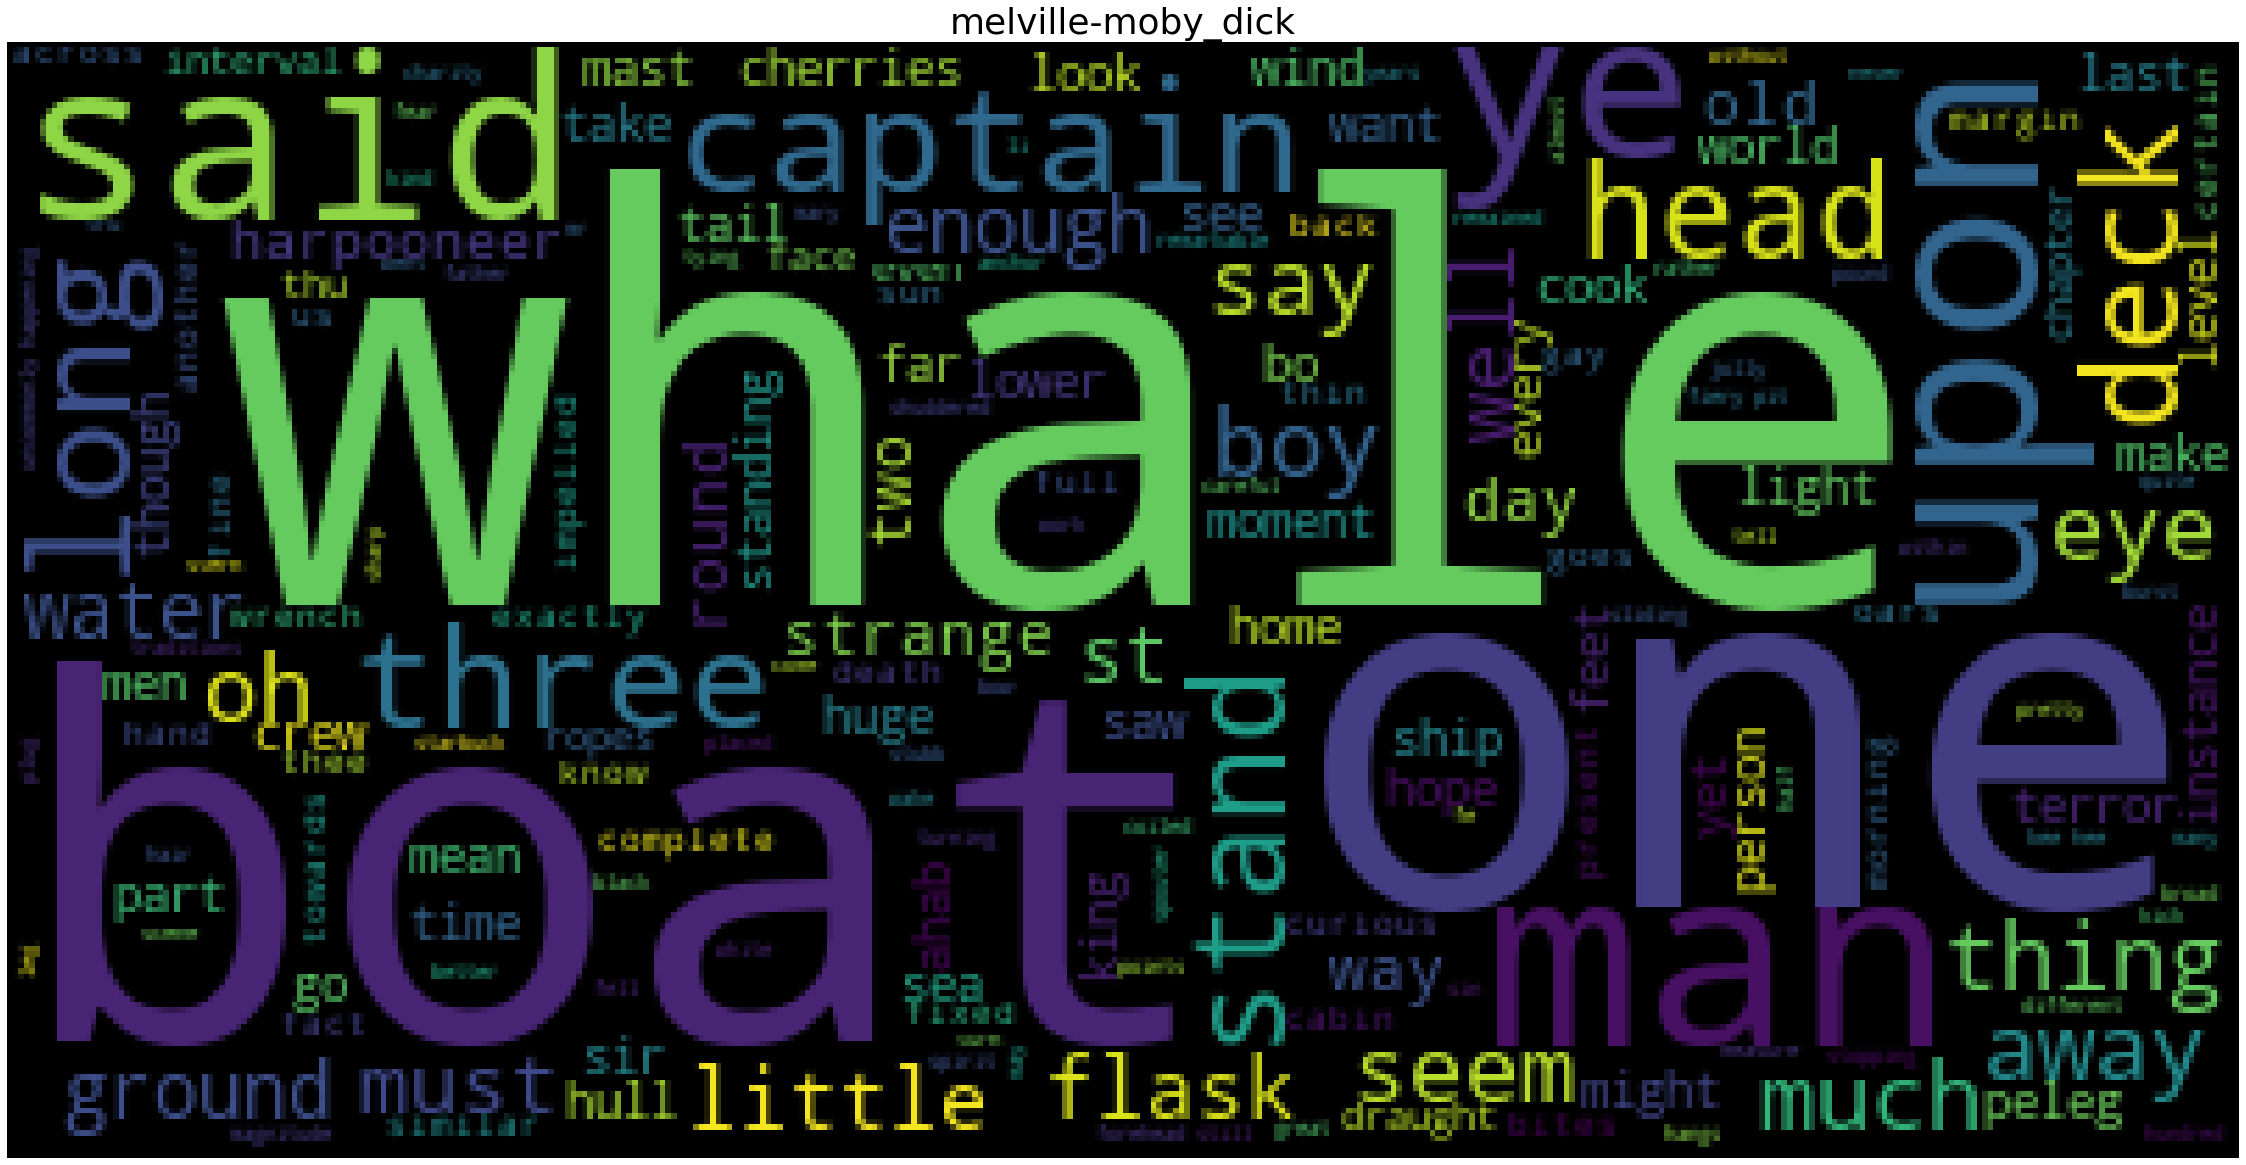

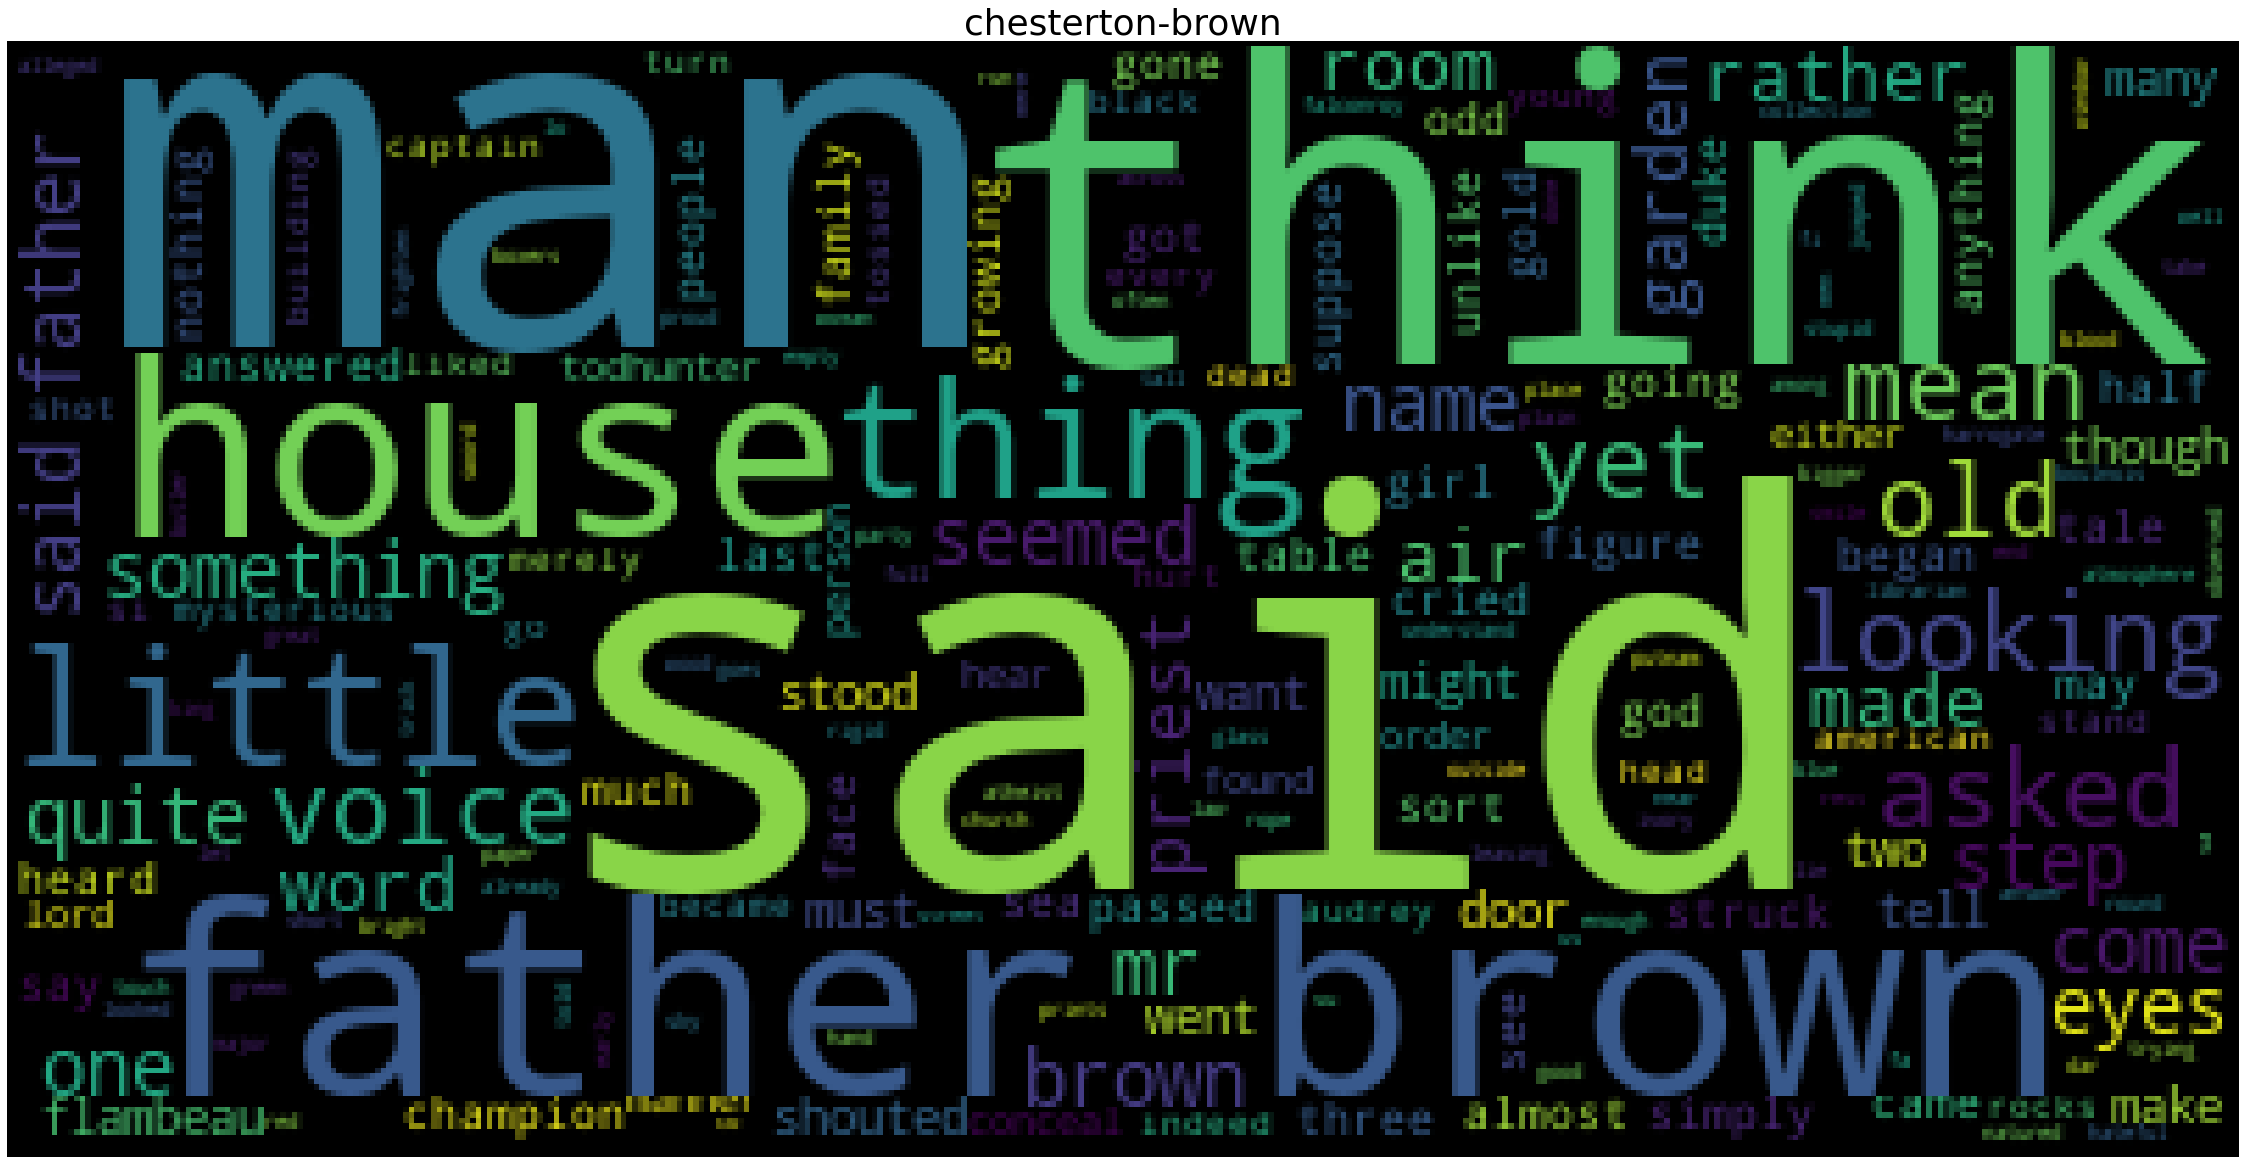

In [41]:
names=['bryant-stories','shakespeare-hamlet','austen-emma','melville-moby_dick','chesterton-brown']
#Generate word cloud
for x in names:
    text=df['sequence'][df['labels']==x].to_string()
    #wordcloud = WordCloud(width = 300, height = 200, random_state=1, background_color='white', colormap='steelblue', collocations=False, stopwords = STOPWORDS).generate(text)
    wordcloud = WordCloud().generate(text)
    # Plot
    plot_cloud(wordcloud,x)